<h1>Entrega 1 </h1>

1.1) Represente en un mismo gráfico la sinusoide , la versión comprimida por un
𝑠𝑖𝑛(2𝑡)
factor 3 y expandida por un factor 2. ¿Qué conclusiones extrae de dichos gráficos?

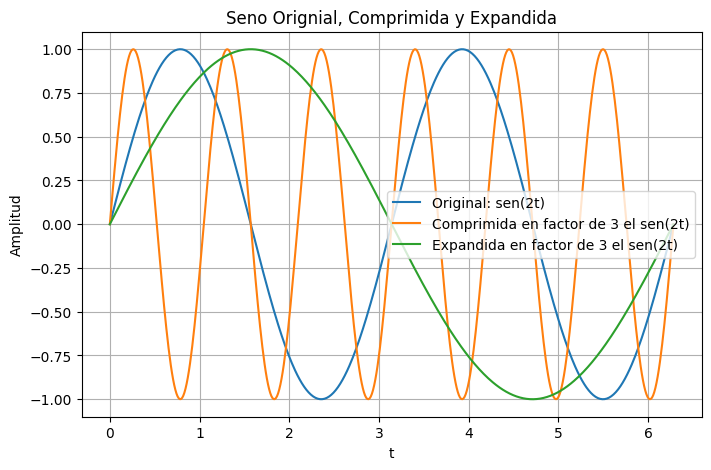

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt

#rango de tiempo
t=np.linspace(0,2*np.pi,500)

#Señales
y_ori=np.sin(2*t) 
y_comp=np.sin(6*t) 
y_expa=np.sin(2*(t/2))

#graficar
plt.figure(figsize=(8,5))
plt.plot(t,y_ori,label="Original: sen(2t)")
plt.plot(t,y_comp,label="Comprimida en factor de 3 el sen(2t)")
plt.plot(t,y_expa,label="Expandida en factor de 3 el sen(2t)")

plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Seno Orignial, Comprimida y Expandida")
plt. legend()
plt.grid(True)
plt.show()
#borrar

Procedimiento:
1) Defino un vector de tiempo t con un numpy.linspace para cubrir varios periodos y genero una señal original de np.sin(2*t)
2) Compresion: multiplico t por 3 --> np.sin(2*3t)
3) Expansion: dividimos t por 2 --> np.sin(2*(t/2))
4) grafico ñas 3 señales juntas usando matplotlib

Comentarios:
la comprension temproal povoca mas oscilaciones en el mismo intervalo (una frecuancia mas alta)
la expansion temporal reduce la cantidad de oscilaciones (frecuencia aprente mas baja)
El mismo principio sirve para cualquier tipo de señal, no solo senoidales

1.2) Graficar la función como usando un valor de b adecuado y de ∏(𝑡) 𝑢(𝑡 + 𝑏) − 𝑢(𝑡 − 𝑏) su elección.

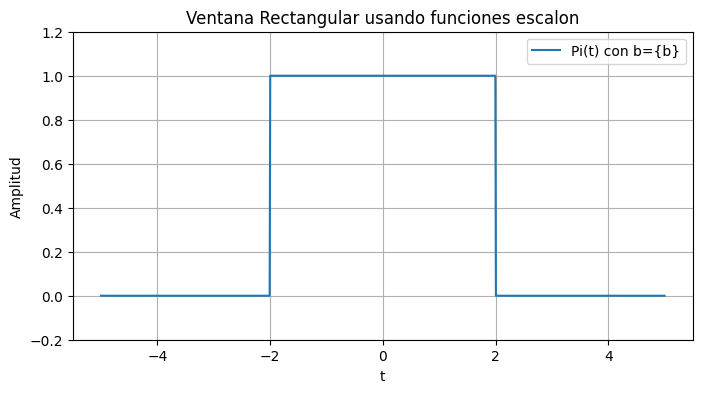

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#defino la funcion escalon unitario
def u(t):
    return np.where(t>= 0,1,0)

#Parametro b
b=2

#Rango de tiempo
t=np.linspace(-5,5,1000)

#ventana rectangular: u(t+b) -u(t-b)
rect = u(t+b) - u(t-b)

#Graficar
plt.figure(figsize=(8,4))
plt.plot(t,rect,label="Pi(t) con b={b}")
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Ventana Rectangular usando funciones escalon")
plt.ylim(-0.2,1.2)
plt.grid(True)
plt.legend()
plt.show()


1.3) Graficar las señales, , 𝑥(𝑡) = 2𝑢(𝑡 + 2) − 𝑢(3 − 3𝑡) 𝑥(𝑡) = 𝑠𝑖𝑛𝑐(2𝑡/π), 𝑥(𝑡) = 𝑠𝑖𝑛𝑐(𝑡) ∏(𝑡/4)

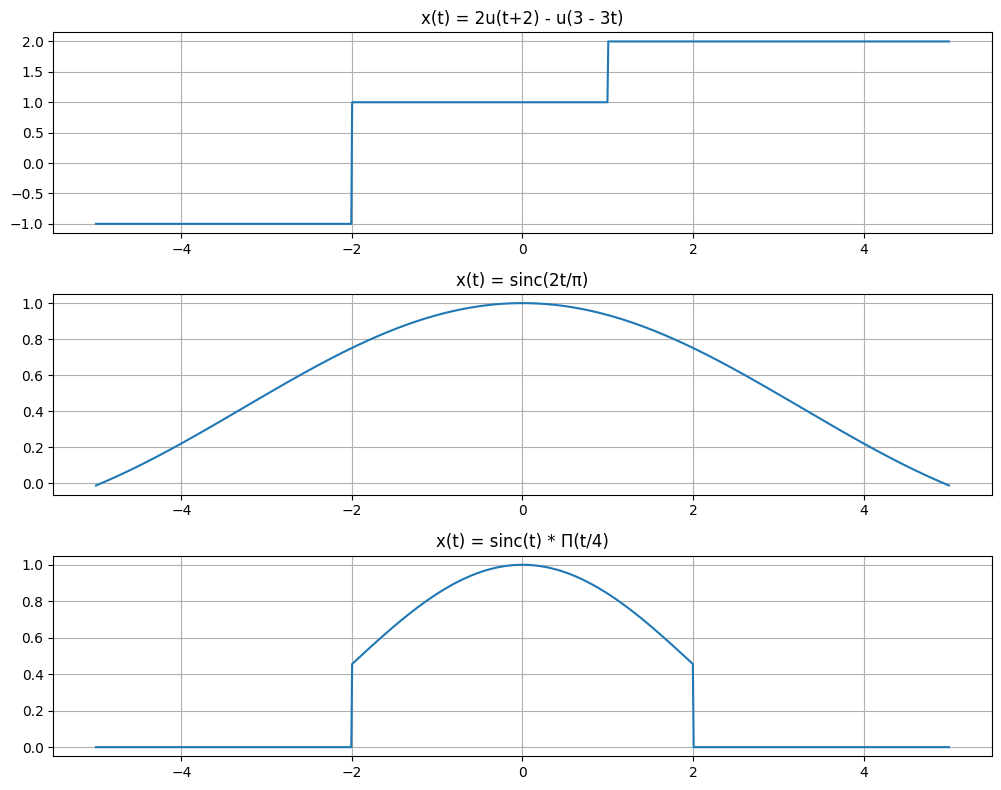

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#escalon unitario
def u(t):
    return np.where(t>= 0,1,0)

#Ventana rectangular Pi(t)=u(t+0.5) - u(t-0.5) para argumento normalizado
def Pi(t):
    return np.where(np.abs(t)<0.5,1,0)

#rango de tiempo
t=np.linspace(-5,5,1000)

#1) 
x1=2*u(t+2)-u(3-3*t)

#2) con ajuste para sinc(x)=sen(x)/x
x2=np.sinc((2*t/np.pi)/np.pi)

#3)
x3=np.sinc(t/np.pi)*Pi(t/4)

plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(t, x1)
plt.title('x(t) = 2u(t+2) - u(3 - 3t)')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, x2)
plt.title('x(t) = sinc(2t/π)')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, x3)
plt.title('x(t) = sinc(t) * Π(t/4)')
plt.grid(True)

plt.tight_layout()
plt.show()

1.4) Representar la señal 𝑥(𝑡) = 𝑠𝑖𝑛(2π𝑡) ∏(𝑡 − 1/2) y computar su energía.

/var/folders/4x/jr5l0vks36g_ydzlth2j7_9m0000gn/T/ipykernel_1196/3985825335.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  energia = np.trapz(np.abs(x)**2, t)


Energia de la señal {np.float64(0.5): 0.4}


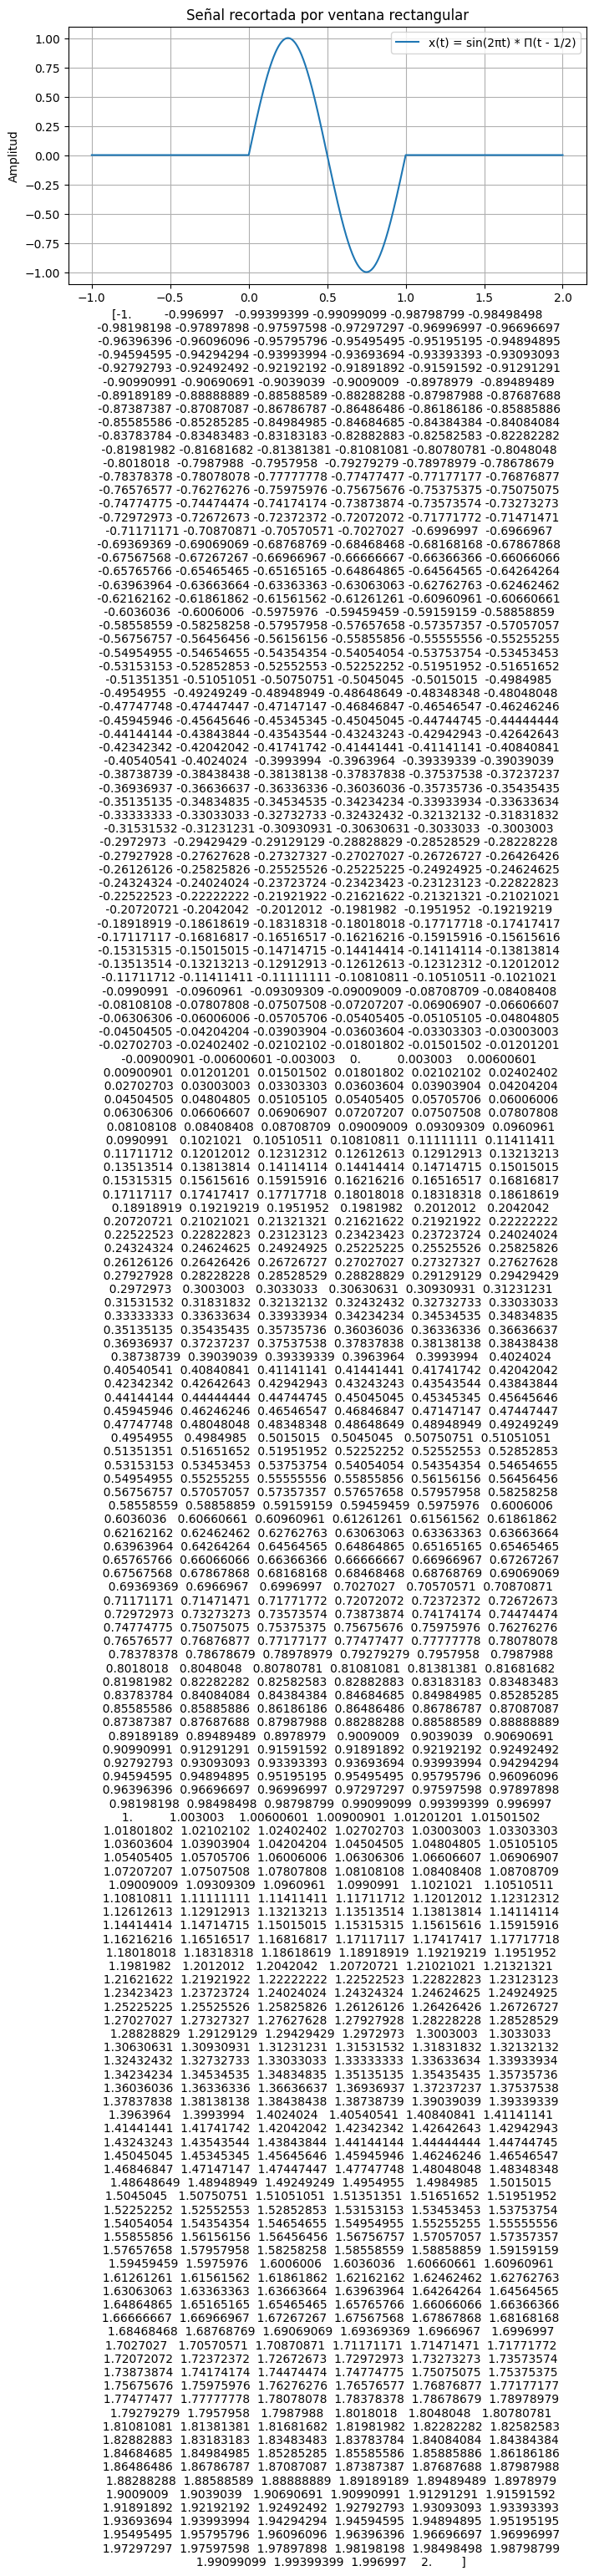

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#defino la funcion pulso
def Pi(t):
    return np.where(np.abs(t)<0.5,1,0)

t=np.linspace(-1,2,1000)

#señal pedida  𝑥(𝑡) = 𝑠𝑖𝑛(2π𝑡) ∏(𝑡 − 1/2)
x = np.sin(2*np.pi*t)*Pi(t-0.5)

#energia de la funcion
energia = np.trapz(np.abs(x)**2, t)

print("Energia de la señal", {energia:.4})

#Graficar
plt.figure(figsize=(8,4))
plt.plot(t, x, label='x(t) = sin(2πt) * Π(t - 1/2)')
plt.xlabel(t)
plt.ylabel("Amplitud")
plt.title("Señal recortada por ventana rectangular")
plt.grid(True)
plt.legend()
plt.show()
